In [1]:
# import packages needed for Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
import scipy.stats as stats
import warnings

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# gain the ability to see all rows if desired
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)
# ignore warnings
warnings.filterwarnings("ignore")  

In [3]:
# read in the cleaned job data csv
df = pd.read_csv("/mnt/c/Users/jpalumbo/DS_Bootcamp/Metis_LinearRegression/Data/Cleaned_Jobs_Data.csv")

In [4]:
df.columns

Index(['Job_Category', 'Seniority', 'Company_Name', 'Rating', 'City', 'State',
       'Region', 'Company_Age', 'Company_Size', 'Company_Type',
       'Company_Sector', 'Company_Industry', 'Company_Revenue', 'Hourly',
       'Employer_Provided', 'Remote', 'AI/ML', 'Cloud_Computing',
       'Data_Engineering', 'Data_Libraries', 'Data_Modeling',
       'Data_Visualization', 'Masters', 'NLP', 'PhD', 'Python', 'R', 'SQL',
       'STEM_Background', 'Scala', 'Projected_Salary_Log', 'Projected_Salary'],
      dtype='object')

In [5]:
df['Projected_Salary'] = df['Projected_Salary'].apply(lambda x: x/1000)  # make it easier to see the coefficients when displayed

In [6]:
# assign columns I want to include in the model to df_model
df_model = df[['Projected_Salary','Job_Category', 'Seniority', 'Rating', 
       'State' ,'Company_Age', 'Company_Size', 'Company_Type', 
       'Company_Sector', 'Company_Revenue', 'Hourly', 'Employer_Provided', 
       'Remote', 'AI/ML', 'Cloud_Computing', 'Data_Engineering',
       'Data_Libraries', 'Data_Modeling', 'Data_Visualization', 'Masters',
       'NLP', 'PhD', 'Python', 'R', 'SQL', 'STEM_Background', 'Scala']]

In [7]:
df_model.shape

(3451, 27)

In [8]:
df.describe()

,Rating,Company_Age,Company_Size,Company_Revenue,Hourly,Employer_Provided,Remote,AI/ML,Cloud_Computing,Data_Engineering,Data_Libraries,Data_Modeling,Data_Visualization,Masters,NLP,PhD,Python,R,SQL,STEM_Background,Scala,Projected_Salary_Log,Projected_Salary
count,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000
mean,3.965068,56.151689,4.883358,9.046371,0.031585,0.157056,0.192988,0.747320,0.199652,0.426253,0.351782,0.190669,0.072153,0.081426,0.181976,0.218198,0.676036,0.928716,0.509418,0.819183,0.092727,11.535698,105.475080
std,0.443140,53.000637,2.265918,2.918292,0.174918,0.363906,0.394701,0.434612,0.399797,0.494603,0.477596,0.392886,0.258779,0.273527,0.385881,0.413082,0.468054,0.257335,0.499984,0.384922,0.290091,0.249484,26.403661
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.680344,16.000000
25%,3.700000,16.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,11.401994,89.500000
50%,4.000000,43.000000,6.000000,9.046371,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.542484,103.000000
75%,4.200000,74.000000,7.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.682668,118.500000
max,5.000000,399.000000,7.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.688499,324.000000


In [9]:
# remove the extreme outliers of 324k projected_salary from df 
df = df[df['Projected_Salary'] != 324.0]   # only one observation

In [10]:
# get dummies for each categorical column
df_model = pd.get_dummies(df_model)

In [11]:
df_model.head()

,Projected_Salary,Rating,Company_Age,Company_Size,Company_Revenue,Hourly,Employer_Provided,Remote,AI/ML,Cloud_Computing,Data_Engineering,Data_Libraries,Data_Modeling,Data_Visualization,Masters,NLP,PhD,Python,R,SQL,STEM_Background,Scala,Job_Category_Data Analyst,Job_Category_Data Engineer,Job_Category_Data Scientist,Job_Category_ML/AI/NLP,Job_Category_Other,Job_Category_Statistician,Seniority_Junior,Seniority_Manager/Director,Seniority_Senior,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_USA,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Company_Type_-1,Company_Type_College / University,Company_Type_Company - Private,Company_Type_Company - Public,Company_Type_Contract,Company_Type_Government,Company_Type_Hospital,Company_Type_Nonprofit Organization,Company_Type_Private Practice / Firm,Company_Type_School / School District,Company_Type_Self-employed,Company_Type_Subsidiary or Business Segment,Company_Sector_-1,Company_Sector_Accounting & Legal,Company_Sector_Aerospace & Defense,Company_Sector_Agriculture & Forestry,"Company_Sector_Arts, Entertainment & Recreation",Company_Sector_Biotech & Pharmaceuticals,Company_Sector_Business Services,"Company_Sector_Construction, Repair & Maintenance",Company_Sector_Consumer Services,Company_Sector_Education,Company_Sector_Enterprise Software & Network Solutions,Company_Sector_Finance,Company_Sector_Government,Company_Sector_Health Care,Company_Sector_Information Technology,Company_Sector_Insurance,Company_Sector_Manufacturing,Company_Sector_Media,Company_Sector_Mining,Company_Sector_Non-Profit,"Company_Sector_Oil, Gas, Energy & Utilities",Company_Sector_Real Estate,"Company_Sector_Restaurants, Bars & Food Services",Company_Sector_Retail,Company_Sector_Staffing & Outsourcing,Company_Sector_Telecommunications,Company_Sector_Transportation & Logistics,Company_Sector_Travel & Tourism
0,106.0,3.965068,56.151689,4.883358,9.046371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,180.0,3.965068,56.151689,4.883358,9.046371,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,87.0,3.965068,56.151689,4.883358,9.046371,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70.0,3.965068,56.151689,4.883358,9.046371,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,140.0,3.965068,56.151689,4.883358,9.046371,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_model.shape  

(3451, 123)

In [13]:
# drop columns not needed in an attempt to reduce multicolinearity
df_model.drop(['Job_Category_Other', 'Company_Type_-1', 'Company_Sector_-1'], axis=1, inplace=True)

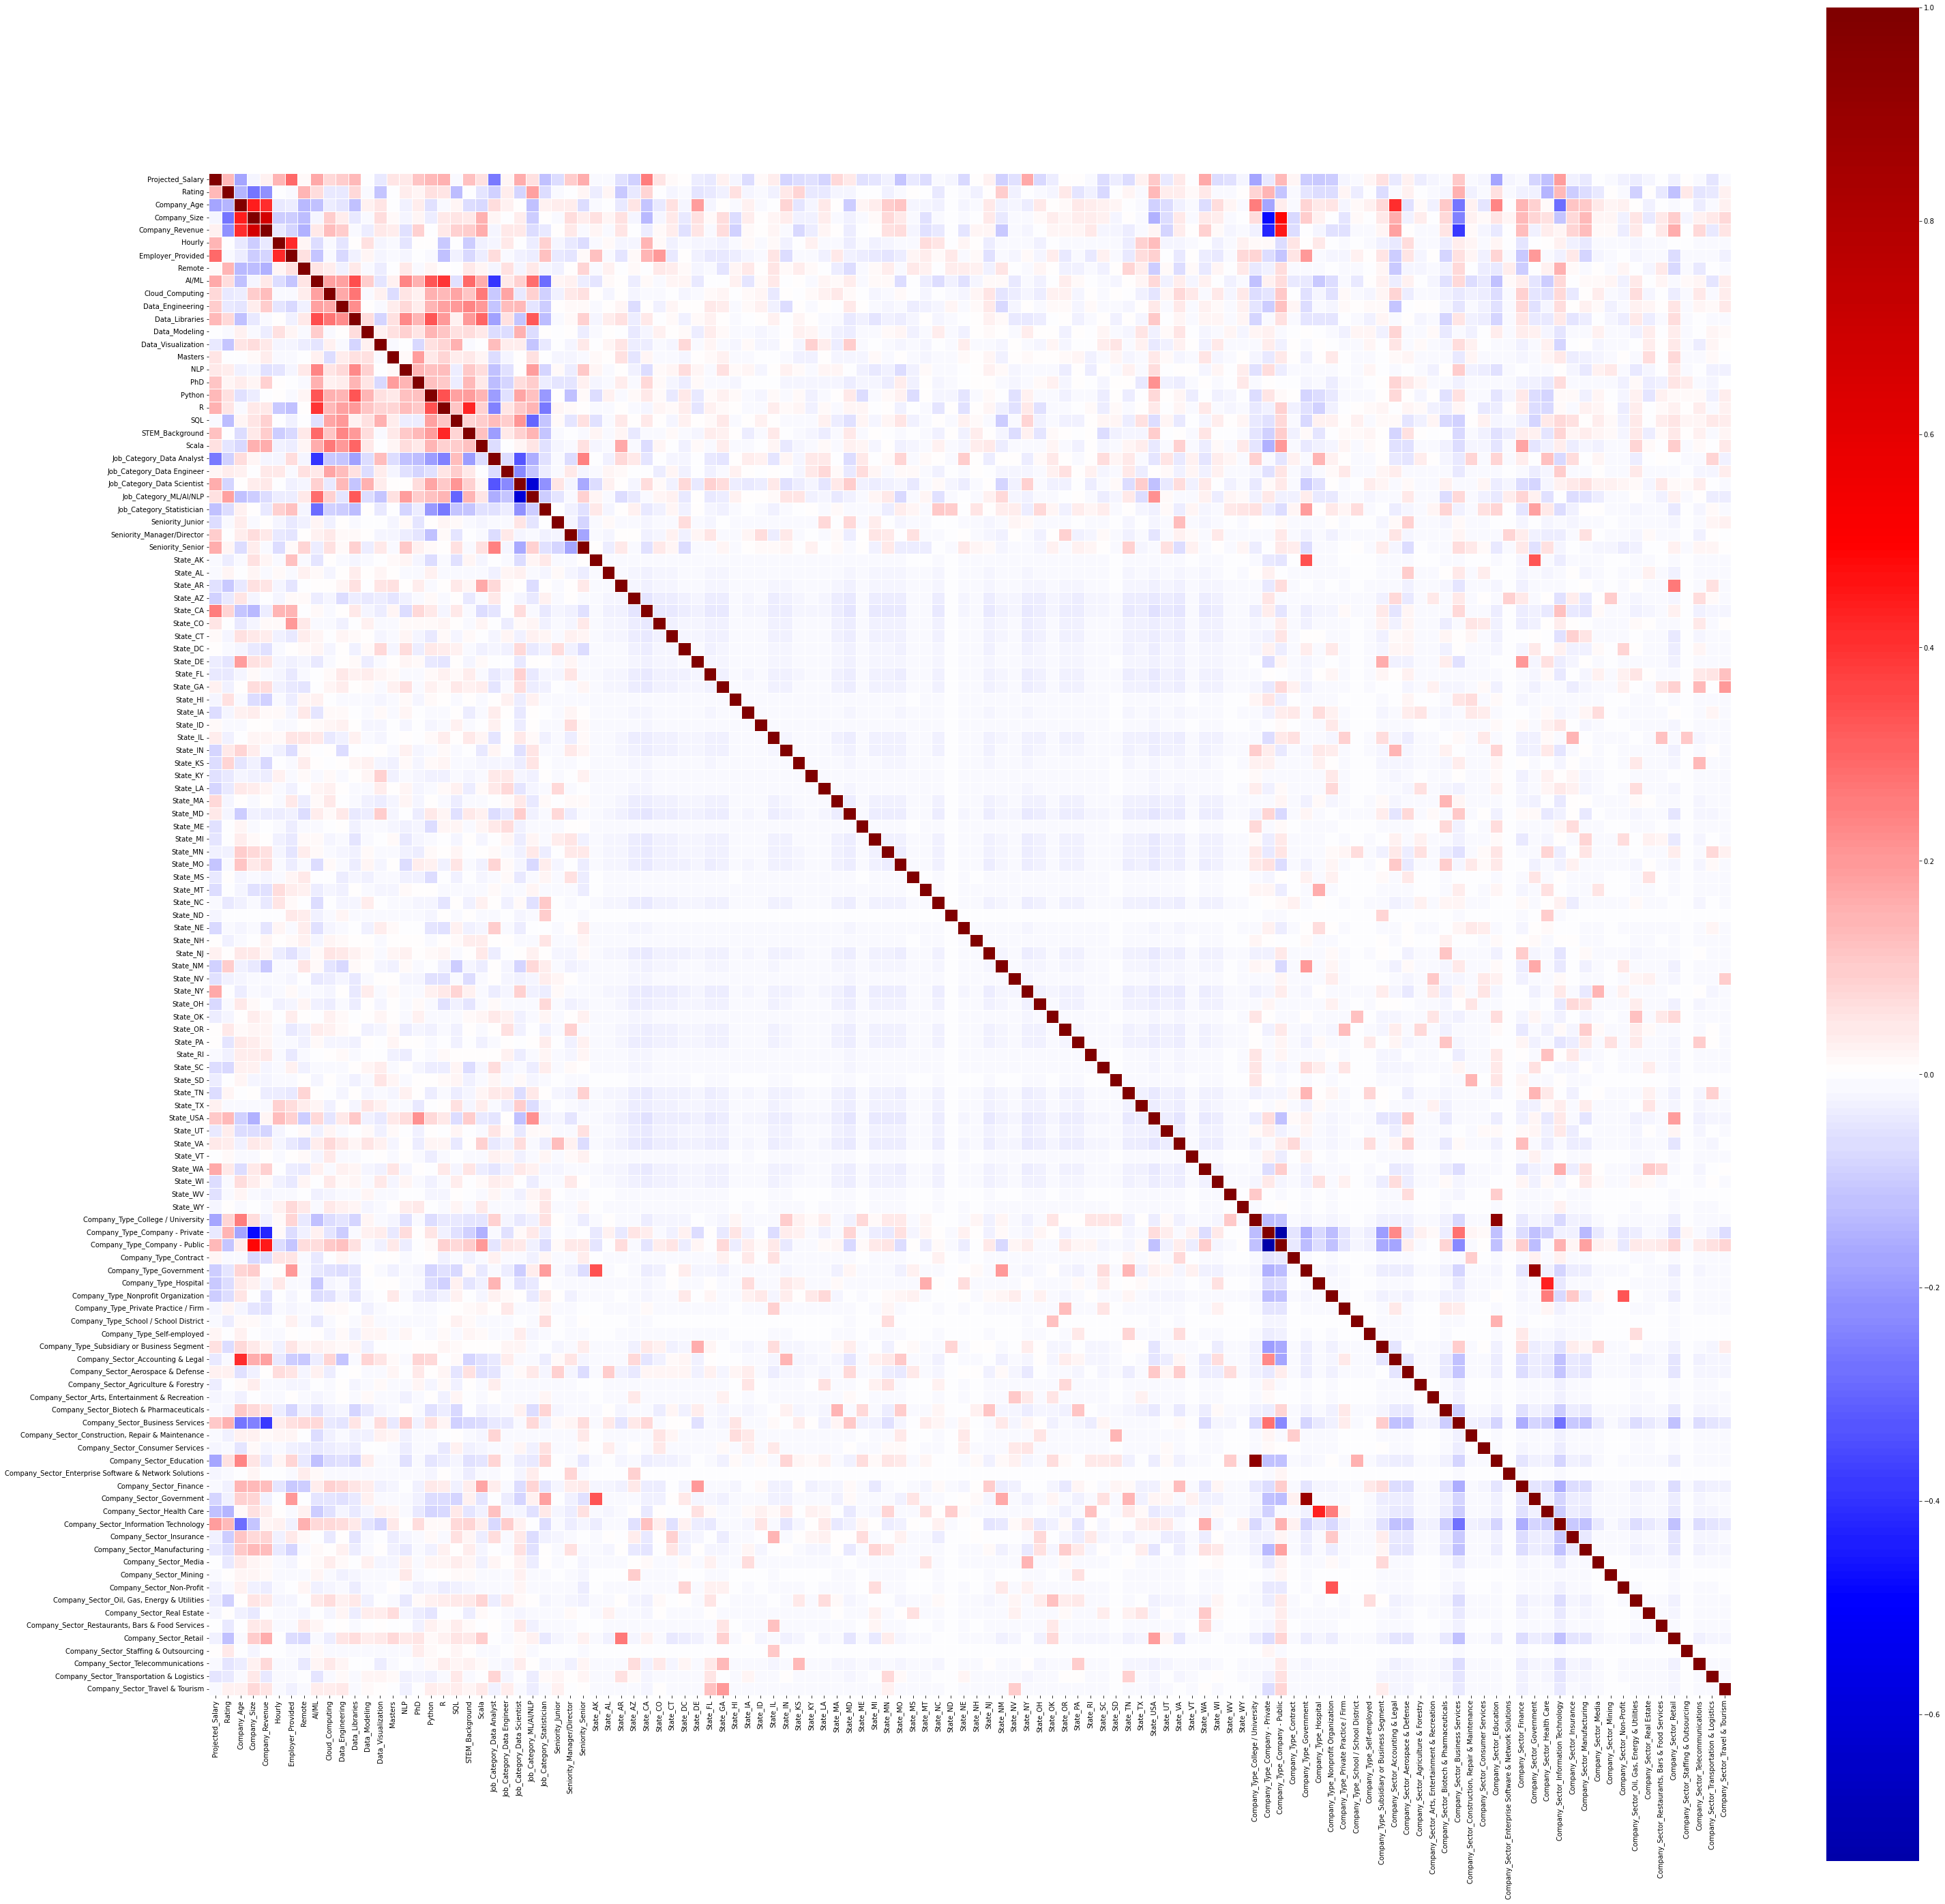

In [14]:
# use heatmap to see if any columns are perfectly correlated in order to further reduce features
plt.figure(figsize=(50,50))
sns.heatmap(df_model.corr(), center=0, cmap='seismic', square=True, linewidth=-1, vmax=1);

In [15]:
# check actual correlation of features that look highly correlated
df_model['Company_Type_College / University'].corr(df_model['Company_Sector_Education']), df_model['Company_Type_Government'].corr(df_model['Company_Sector_Government'])

(0.9323185530135415, 0.8964393268348495)

In [16]:
# check how many rows are affected
print(len(df_model[df_model['Company_Type_College / University'] & df_model['Company_Sector_Education'] == 1]))
len(df_model[df_model['Company_Type_Government'] & df_model['Company_Sector_Government'] == 1])

68


80

In [17]:
# I decided to drop one column for each of these pairs in an attempt to further reduce multicolinearity
df_model.drop(['Company_Sector_Education', 'Company_Sector_Government'], axis = 1, inplace=True)

### Modeling

In [18]:
# assign columns to X and y values to do a quick raw data analysis without any train_test_split
X = df_model.drop(['Projected_Salary'], axis=1)
y = df_model['Projected_Salary'].values

In [19]:
# raw data analysis using a liear regression
lm = LinearRegression()
lm.fit(X, y)
pred = lm.predict(X)
lm.score(X, y)

0.5051217189859889

Not bad, let's see if we can improve our R^2, or improve our interpretability

In [20]:
# functions to plot and producde RMSE
def diagnostic_plot(y, pred):
    '''
    Plots the Regression Fit, Residual Plot and Normal Q-Q Plot for
    y and its predictions (Hist option available below if desired)
    '''
    
    plt.figure(figsize=(25,10), dpi=75)
    res = y - pred
    
    plt.subplot(1, 3, 1)
    plt.grid(color='#4d4d4d', linestyle='-.', linewidth=0.1)
    sns.regplot(x=y, y=res, scatter_kws={'s': 2}, color='#d14949')
    plt.title("Regression Fit")
    plt.xlabel("Response")
    plt.ylabel("Residuals")
    
    plt.subplot(1, 3, 2)
    plt.grid(color='#4d4d4d', linestyle='-.', linewidth=0.1)
    plt.scatter(pred, res, c='#d14949')
    plt.title("Residual Plot")
    plt.xlabel("Response")
    plt.ylabel("Residuals")
    
    ax = plt.subplot(1, 3, 3)
    plt.grid(color='#4d4d4d', linestyle='-.', linewidth=0.1)
    plt.tick_params(labelsize=10)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
#     plt.subplot(1, 4, 3)
#     plt.grid(color='#4d4d4d', linestyle='-.', linewidth=0.1)
#     plt.tick_params(labelsize=10)
#     plt.hist(res, color='#d14949')
#     plt.title("Residual Histogram")

def rmse(model, x, y):
    '''
    Produces the mean and std RMSE for a 50 fold cross validation
    '''
    mean_squared_errors = np.abs(cross_val_score(model, x, y, cv=50, scoring='neg_mean_squared_error'))
    root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
    print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))
    print("50-fold std RMSE: ", np.std(root_mean_squared_errors))

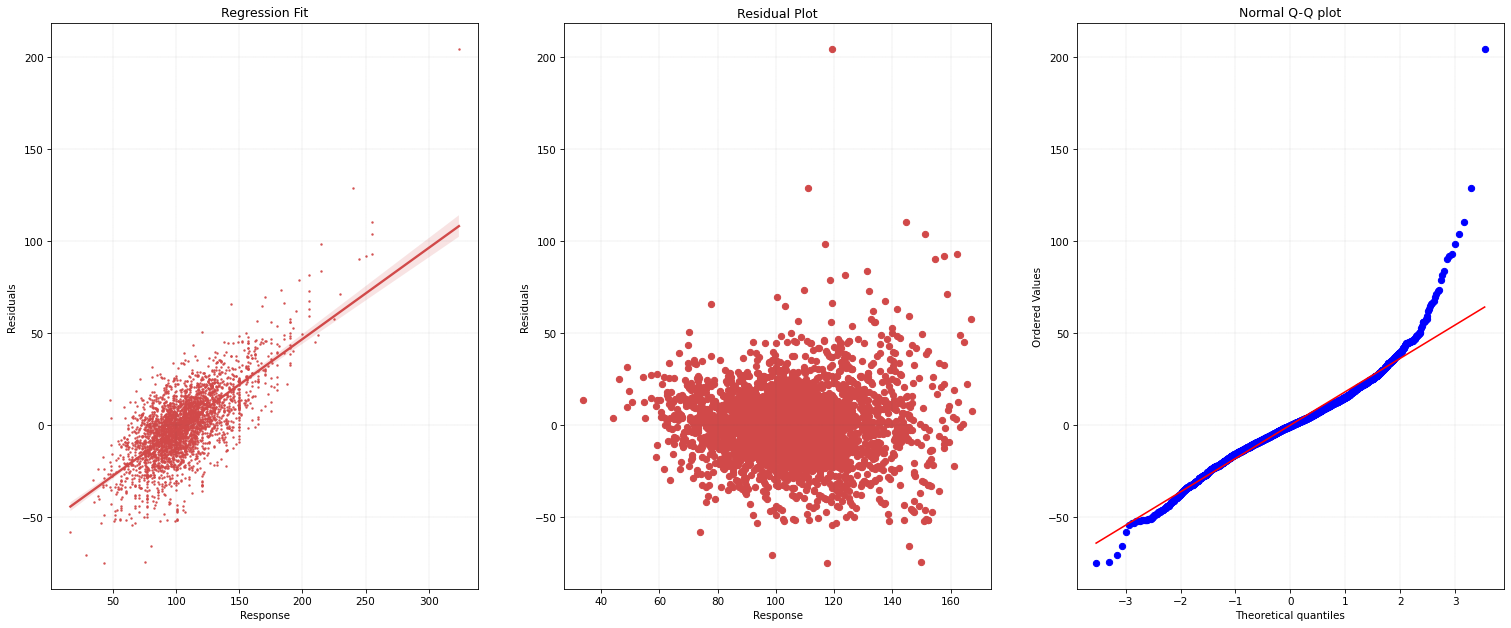

In [21]:
# check the diagnostic plots to see if we have any issues of heteroskedasticity
diagnostic_plot(y, pred)

In [22]:
# the data appears to have a bit of heteroskedacity, I will look to take power to possibly remedy
# & then run same model vs the sqrt of the target variable to see if heteroskedacity lessens
X_sqr = df_model.drop(['Projected_Salary'], axis=1)
y_sqr = np.power(df_model['Projected_Salary'].values, .5)

In [23]:
lm_sqr = LinearRegression()
lm_sqr.fit(X_sqr, y_sqr)
pred = lm_sqr.predict(X_sqr)
lm_sqr.score(X_sqr, y_sqr)

0.5142812053835105

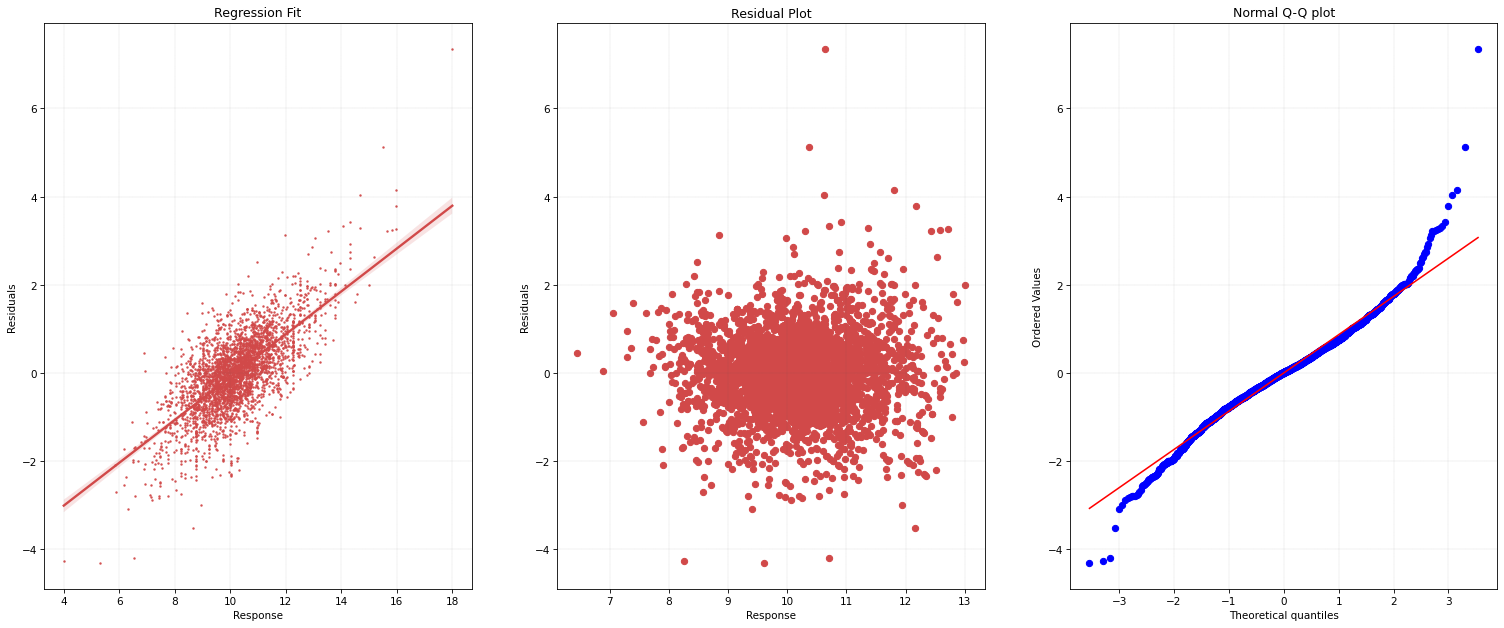

In [24]:
diagnostic_plot(y_sqr, pred);

The residual plot looks to have slightly less heteroskedasticity, however, the Q-Q plot looks worse. I will move forward without taking any transformation on the target variable.

#### Linear Regression

In [25]:
# reassign columns to X and y values
X = df_model.drop(['Projected_Salary'], axis=1)
y = df_model['Projected_Salary']

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# run a linear regression model on the train set
lm_first = LinearRegression()
lm_first.fit(X_train, y_train)
lm_first.score(X_train, y_train)

0.5152274934405613

In [27]:
# check average RMSE for 50 cross validations
rmse(lm_first, X_train, y_train)

50-fold mean RMSE:  18.980088591678058
50-fold std RMSE:  2.8948321864986926


In [28]:
# run linear regression on stats model to see more in depth statistical analysis
X_stats = X = sm.add_constant(X_train)
model = sm.OLS(y_train, X_stats)
results = model.fit()
results_summary = results.summary()

results_as_html = results_summary.tables[1].as_html()
stats_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [29]:
# check features with highest coefficients
stats_df.sort_values(['coef'], ascending=False)[:10]

,coef,std err,t,P>|t|,[0.025,0.975]
const,65.0692,14.438,4.507,0.000,36.759,93.380
Employer_Provided,23.1232,1.264,18.299,0.000,20.645,25.601
Company_Sector_Staffing & Outsourcing,22.7608,19.051,1.195,0.232,-14.595,60.117
Seniority_Manager/Director,21.4912,1.845,11.646,0.000,17.873,25.110
State_WA,20.2610,13.543,1.496,0.135,-6.295,46.817
State_CA,19.9823,13.476,1.483,0.138,-6.443,46.407
State_NY,18.4112,13.517,1.362,0.173,-8.094,44.917
Company_Type_Self-employed,17.9518,9.828,1.827,0.068,-1.320,37.224
Company_Type_Contract,17.0315,7.217,2.360,0.018,2.880,31.183
Seniority_Senior,13.2465,0.820,16.148,0.000,11.638,14.855


In [30]:
# check features with lowest coefficients
stats_df.sort_values(['coef'], ascending=False)[-5:]

,coef,std err,t,P>|t|,[0.025,0.975]
State_MT,-21.3878,14.431,-1.482,0.138,-49.685,6.909
State_WY,-22.6129,15.444,-1.464,0.143,-52.896,7.670
State_MS,-23.3211,14.794,-1.576,0.115,-52.331,5.689
Company_Sector_Enterprise Software & Network Solutions,-28.8605,19.081,-1.512,0.131,-66.277,8.556
State_ND,-33.6535,23.377,-1.440,0.150,-79.494,12.186


#### Lasso Regression

In [31]:
# not great so let's try a lasso regression to see if we can zero out some of the coefficients \
# and improve our model
# first standardize the data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train).astype(float)
X_scaled_test = scaler.fit_transform(X_test).astype(float)
X_scaled_train.mean(axis = 0)  # check if means are 0's
X_scaled_train.std(axis = 0)   # check if std are 1's

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
# run a linear regression model on the scaled X-train data
lasso_scaled = Lasso()
lasso_scaled.fit(X_scaled_train, y_train)
lasso_scaled.score(X_scaled_train, y_train)

0.4401735012374881

In [33]:
# check the RMSE
rmse(lasso_scaled, X_scaled_train, y_train)

50-fold mean RMSE:  19.804045580532122
50-fold std RMSE:  3.199888342803009


In [34]:
# possibly finding the optimal alpha for the lasso regression will improve our score
# find optimal alpha for lasso
alpha = []
error = []
for i in range (1,100):
    alpha.append(i/100)
    lasso_vals = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso_vals, X_scaled_train, y_train, scoring='neg_mean_absolute_error', cv=50)))

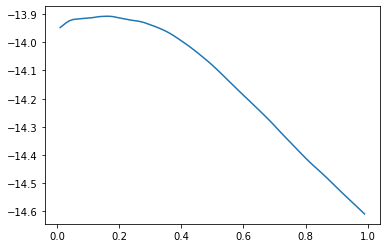

In [35]:
plt.plot(alpha, error);

In [36]:
# find max alpha
tup = tuple(zip(alpha, error))
df_alpha = pd.DataFrame(tup, columns=['Alpha', 'Error'])
df_alpha[df_alpha.Error == max(df_alpha.Error)]

,Alpha,Error
15,0.16,-13.907437


In [37]:
# use the best alpha found above and plug into the lasso regression
lasso_scaled_alpha = Lasso(alpha=.16)
lasso_scaled_alpha.fit(X_scaled_train, y_train)
lasso_scaled_alpha.score(X_scaled_train, y_train)

0.5102972458992578

In [38]:
# check the RMSE
rmse(lasso_scaled_alpha, X_scaled_train, y_train) # on par with linear 

50-fold mean RMSE:  18.94464404069186
50-fold std RMSE:  3.001034381820726


#### Ridge Regression

In [39]:
# we were able to significantly imporove our lasso regression, but only on par with our
# linear regression, so let's test with a Ridge
ridge_scaled = Ridge()
ridge_scaled.fit(X_scaled_train,y_train)
ridge_scaled.score(X_scaled_train, y_train)

0.5152271938971952

In [40]:
# the r^2 finished on par, let's check RMSE
rmse(ridge_scaled, X_scaled_train, y_train)

50-fold mean RMSE:  18.971159508453844
50-fold std RMSE:  2.8983606253334373


In [41]:
# the RMSE also finsihed on par, let's see if we can improve with a better alpha for ridge
alpha = []
error = []
for i in range (1,100):
    alpha.append(i/100)
    ridge_vals = Ridge(alpha=(i/100))
    error.append(np.mean(cross_val_score(ridge_vals, X_scaled_train, y_train, scoring='neg_mean_absolute_error', cv=50)))

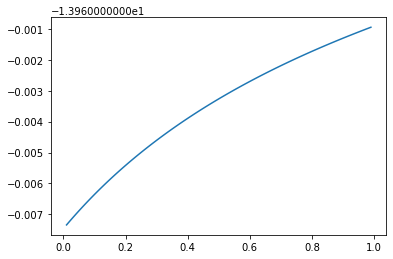

In [42]:
plt.plot(alpha, error);

In [43]:
# find max alpha
tup = tuple(zip(alpha, error))
df_alpha = pd.DataFrame(tup, columns=['Alpha', 'Error'])
df_alpha[df_alpha.Error == max(df_alpha.Error)]

,Alpha,Error
98,0.99,-13.960951


In [44]:
# that's a high alpha, which means a general fit is likely better for the dataset
# let's plug it in and run another Ridge Regression
ridge_scaled_alpha = Ridge(alpha=.99)
ridge_scaled_alpha.fit(X_scaled_train,y_train)
ridge_scaled_alpha.score(X_scaled_train, y_train)

0.5152271992494268

In [45]:
# the r^2 finished on par, let's check RMSE
rmse(ridge_scaled_alpha, X_scaled_train, y_train)

50-fold mean RMSE:  18.971203016850527
50-fold std RMSE:  2.898340383939644


#### Random Forest

In [46]:
# overall, Lasso and Ridge did not improve our predicitve powers with regard to salary
# possibly a more advanced model is needed such as a random forest
# let's test it
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, random_state = 42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
rf.score(X_train, y_train)
## the following line is for a more granular assessment of rf train vs test, looking for best approxinmation at this point
#print(f'R^2 Training Score: {round(rf.score(X_train, y_train), 2)} \nOOB Score: {round(rf.oob_score_, 2)}, \nR^2 Test Score: {round(rf.score(X_test, y_test), 2)}')

0.93759716359409

In [47]:
# WOW, what a great R^2, but how does the RMSE stack up?
rmse(rf, X_train, y_train)

50-fold mean RMSE:  16.722724105067304
50-fold std RMSE:  3.7802131786724917


In [48]:
# calculate the mean decrease in impurity or Gini Impurity to identify the features with the highest impact \
# for our rf model, which has given us the best R^2 and best RMSE
feature_names = [f'{i}' for i in X_train.columns]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)[:20]
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
forest_importances = forest_importances[:20]

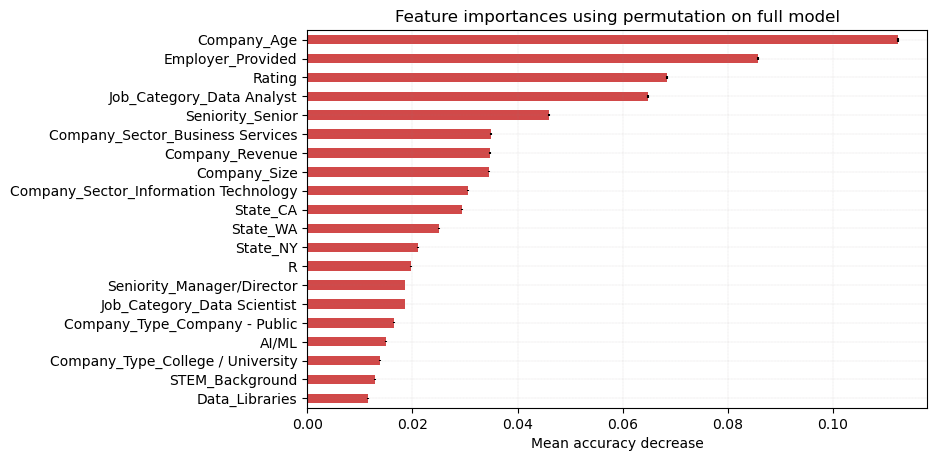

In [50]:
# bar plot of Gini impurities
plt.figure(figsize=(8,5), dpi=100)
forest_importances.plot.barh(yerr=forest_importances, color='#d14949')
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean accuracy decrease")
plt.gca().invert_yaxis()
plt.grid(color='#948789', linestyle='-.', linewidth=0.1);

## unusable code due to computer issues
## plotly bar chart, decided not to use
# fig = px.bar(forest_importances, orientation='h')
# fig.update_layout(hovermode='closest', title_text="Feature importances using permutation on full model", \
#                   barmode='stack', yaxis={'categoryorder':'total ascending'}, width=800, height=400, template='ggplot2')
# fig.update_traces(marker_color='#fa8072')
# fig.update_xaxes(title_text="Mean accuracy decrease")
# fig.update_yaxes(title='')
# fig.show()

In [51]:
# calculate the permutation on full model to identify the features with the highest impact \
# for our rf model, which has given us the best R^2 and best RMSE
feature_names = [f'{i}' for i in X_train.columns]
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
forest_importances = forest_importances[:20]

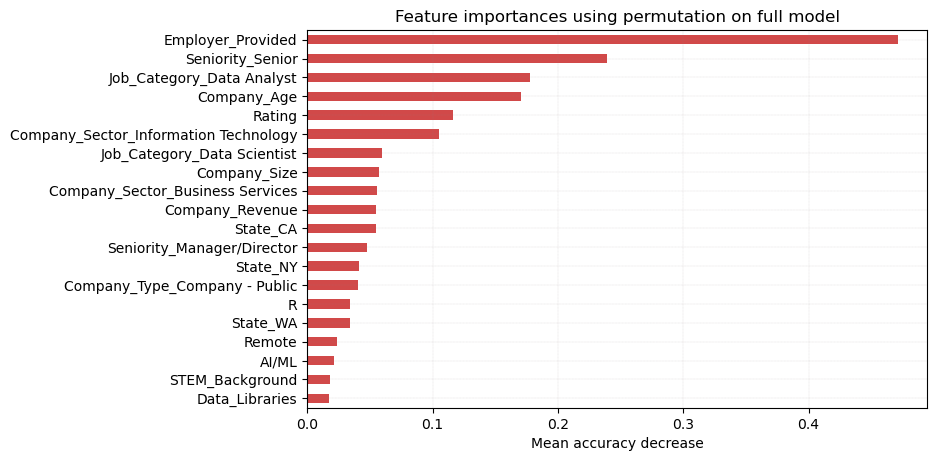

In [52]:
# bar plot for permutation impact
plt.figure(figsize=(8,5), dpi=100)
forest_importances.plot.barh(yerr=result, color='#d14949')
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean accuracy decrease")
plt.gca().invert_yaxis()
plt.grid(color='#948789', linestyle='-.', linewidth=0.1);

## unusable code due to computer issues
# fig = px.bar(forest_importances, orientation='h')
# fig.update_layout(hovermode='closest', title_text="Feature importances using permutation on full model", \
#                   barmode='stack', yaxis={'categoryorder':'total ascending'}, width=800, height=400, template='ggplot2')
# fig.update_traces(marker_color='#fa8072')
# fig.update_xaxes(title_text="Mean accuracy decrease")
# fig.update_yaxes(title='')
# fig.show()

#### Test Ensembles

In [53]:
# so far the random forest produces the best R^2 and best RMSE, placing our \
# predictions within a ~$17k range

# test
pred_lm = lm_first.predict(X_test)
pred_lasso = lasso_scaled_alpha.predict(X_scaled_test)
pred_ridge = ridge_scaled_alpha.predict(X_scaled_test)
pred_rf = rf.predict(X_test)

In [54]:
mean_absolute_error(y_test, pred_lm)
np.sqrt(metrics.mean_squared_error(y_test, pred_lm))

19.74312025342695

In [55]:
mean_absolute_error(y_test, pred_lasso)
np.sqrt(metrics.mean_squared_error(y_test, pred_lasso))

19.780008154532524

In [56]:
mean_absolute_error(y_test, pred_ridge)
np.sqrt(metrics.mean_squared_error(y_test, pred_ridge))

19.81717561708278

In [57]:
mean_absolute_error(y_test, pred_rf)
np.sqrt(metrics.mean_squared_error(y_test, pred_rf))

16.93992029514932

Our best model is the Randome Forest, so let's see how it graphs

In [58]:
def get_rmse(test_size, X, y):
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=test_size, random_state=1)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    return train_rmse,test_rmse

In [59]:
X = df_model.drop(['Projected_Salary'], axis=1)
y = df_model['Projected_Salary'].values

In [60]:
train_rmses = []
test_rmses = []
training_size = 1 - np.arange(0.01,1,0.01)
for test_size in np.arange(0.01,1,0.01):
    train_rmse,test_rmse = get_rmse(test_size, X, y)
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)

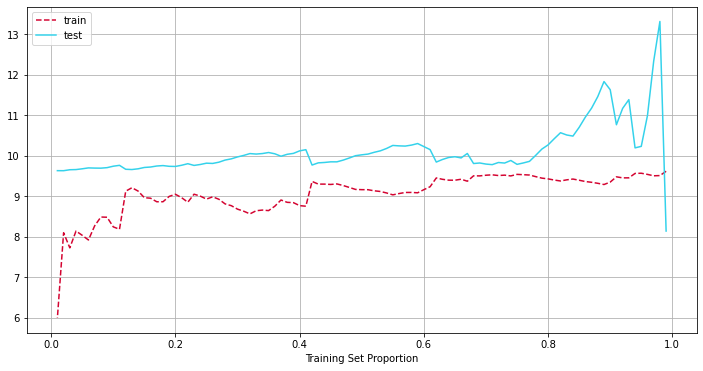

In [61]:
plt.figure(figsize=(12,6))
plt.plot(training_size,train_rmses, '--',label='train', color='#d40431')
plt.plot(training_size,test_rmses,label='test',color='#34d2eb')
plt.legend()
plt.grid()
plt.xlabel('Training Set Proportion')
plt.show()

Test set is higher, which is what we want to see. 

# Can we produce better results?

Let's try removing features with higher p values in an attempt to gain better interpretation of the model.

In [62]:
# reassign columns to X and y values
X = df_model.drop(['Projected_Salary'], axis=1)
y = df_model['Projected_Salary'].values

In [63]:
# run stats model to get p values after a linear regression
X_stats = X = sm.add_constant(X)
model = sm.OLS(y, X_stats)
results = model.fit()
results_summary = results.summary()

results_as_html = results_summary.tables[1].as_html()
stats_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [64]:
# check features with highest coefficients
stats_df.sort_values(['coef'], ascending=False)[:10]

,coef,std err,t,P>|t|,[0.025,0.975]
const,63.0186,14.280,4.413,0.000,35.021,91.017
Employer_Provided,23.9253,1.138,21.031,0.000,21.695,26.156
Company_Sector_Staffing & Outsourcing,22.9305,19.126,1.199,0.231,-14.569,60.430
State_CA,20.8572,13.536,1.541,0.123,-5.682,47.396
State_WA,20.7860,13.592,1.529,0.126,-5.863,47.435
Seniority_Manager/Director,20.6157,1.665,12.383,0.000,17.351,23.880
State_NY,19.7360,13.580,1.453,0.146,-6.891,46.363
Company_Type_Self-employed,18.6084,8.827,2.108,0.035,1.302,35.915
Seniority_Senior,13.1122,0.742,17.670,0.000,11.657,14.567
Company_Sector_Accounting & Legal,10.1016,2.364,4.274,0.000,5.467,14.736


In [65]:
# check features with lowest coefficients
stats_df.sort_values(['coef'], ascending=False)[-5:]

,coef,std err,t,P>|t|,[0.025,0.975]
State_MS,-20.2457,14.629,-1.384,0.166,-48.928,8.437
State_MT,-20.9143,14.366,-1.456,0.146,-49.081,7.252
State_WY,-24.2294,14.879,-1.628,0.104,-53.401,4.943
Company_Sector_Enterprise Software & Network Solutions,-27.3519,19.162,-1.427,0.154,-64.923,10.220
State_ND,-31.8177,23.472,-1.356,0.175,-77.839,14.204


In [66]:
# create df with features that have p values less than .05
stats_df = stats_df[stats_df['P>|t|'] < .05]

In [67]:
# get the features into a list
p_val_list = stats_df.index.values.tolist()

In [68]:
# remove const feature and add the target variable projected_salary
p_val_list.remove('const')
p_val_list.append('Projected_Salary')

In [69]:
# create new df with desired columns
df_condensed = df_model[p_val_list]

In [70]:
len(df_condensed.columns)

27

In [71]:
# assign condensed columns to X and y values
X_cond = df_condensed.drop(['Projected_Salary'], axis=1)
y_cond = df_condensed['Projected_Salary'].values

# create train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cond, y_cond, test_size=0.2, random_state=42)

#### Linear Regression

In [72]:
# run a new linear regression on the reduced data set
lm_reduced = LinearRegression()
lm_reduced.fit(X_train2, y_train2)
lm_reduced.score(X_train2, y_train2)

0.38960112071705133

In [73]:
# check the RMSE for a 50 fold cross validation
rmse(lm_reduced, X_train2, y_train2)

50-fold mean RMSE:  20.591737888803735
50-fold std RMSE:  3.0851683371286


#### Lasso Regression

In [74]:
# reducing features significantly reduced our R^2, let's check a lasso regression
# standardize variables for Lasso regression
scaler = StandardScaler()
X_scaled_train2 = scaler.fit_transform(X_train2).astype(float)
X_scaled_test2 = scaler.fit_transform(X_test2).astype(float)
X_scaled_train2.mean(axis = 0)  # check if means are 0's
X_scaled_train2.std(axis = 0)   # check if std are 1's

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [75]:
# run lasso regression on standardized data 
lasso_scaled_reduced = Lasso()
lasso_scaled_reduced.fit(X_scaled_train2, y_train2)
lasso_scaled_reduced.score(X_scaled_train2, y_train2)

0.3545926962283762

In [76]:
# the lasso regression was also significantly reduced, 
# check the RMSE for a 50 fold cross validation
rmse(lasso_scaled_reduced, X_scaled_train2, y_train2)

50-fold mean RMSE:  21.105779139225827
50-fold std RMSE:  3.292603887252855


In [77]:
# possibly finding the optimal alpha for the lasso regression will improve our score
# find optimal alpha for lasso
alpha = []
error = []
for i in range (1,100):
    alpha.append(i/100)
    lasso_vals = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso_vals, X_scaled_train2, y_train2, scoring='neg_mean_absolute_error', cv=50)))

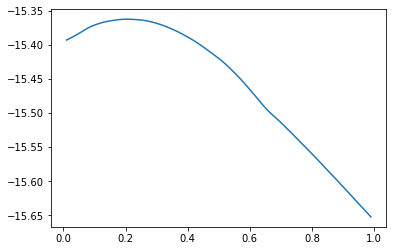

In [78]:
plt.plot(alpha, error);

In [79]:
# find best alpha
tup = tuple(zip(alpha, error))
df_alpha = pd.DataFrame(tup, columns=['Alpha', 'Error'])
df_alpha[df_alpha.Error == max(df_alpha.Error)]

,Alpha,Error
20,0.21,-15.36195


In [80]:
# use the best alpha found above and plug into the lasso regression
lasso_scaled_reduced_alpha = Lasso(alpha=.22)
lasso_scaled_reduced_alpha.fit(X_scaled_train2, y_train2)
lasso_scaled_reduced_alpha.score(X_scaled_train2, y_train2)

0.387509912847404

In [81]:
# great, we were able to improve the R^2 slightly
# now check the RMSE for 50 cv fold
rmse(lasso_scaled_reduced_alpha, X_scaled_train2, y_train)

50-fold mean RMSE:  20.608800939083153
50-fold std RMSE:  3.126889649747204


#### Ridge Regression

In [82]:
# check out a ridge model for comparison
ridge_scaled_reduced = Ridge()
ridge_scaled_reduced.fit(X_scaled_train2, y_train2)
ridge_scaled_reduced.score(X_scaled_train2, y_train2)

0.3896010494508413

In [83]:
# sadly the R^2 ened up worse with condensed features, now to check RMSE
# NOTE: I am not going to attempt to find best alpha, as its addition in previous \
# model building provided no impact
rmse(ridge_scaled_reduced, X_scaled_train2, y_train2)

50-fold mean RMSE:  20.591580886144428
50-fold std RMSE:  3.085545247727761


#### Random Forest

In [84]:
# check and see what a random forest can generate
rf_reduced = RandomForestRegressor()
rf_reduced.fit(X_train2, y_train2)
rf_reduced.score(X_train2, y_train2)

0.8946074514771492

In [85]:
# our random foreset model was certainly affected by the reduced data
# check the RMSE for 50 cv fold
rmse(rf_reduced, X_scaled_train2, y_train2)

50-fold mean RMSE:  17.976854058161162
50-fold std RMSE:  3.9118320078362916


In [86]:
# calculate the mean decrease in impurity to identify the features with the \
# highest impact (Gini impurities) for reduced features
feature_names = [f'{i}' for i in X_train2.columns]
importances = rf_reduced.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_reduced.estimators_], axis=0)[:20]
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
forest_importances = forest_importances[:20]

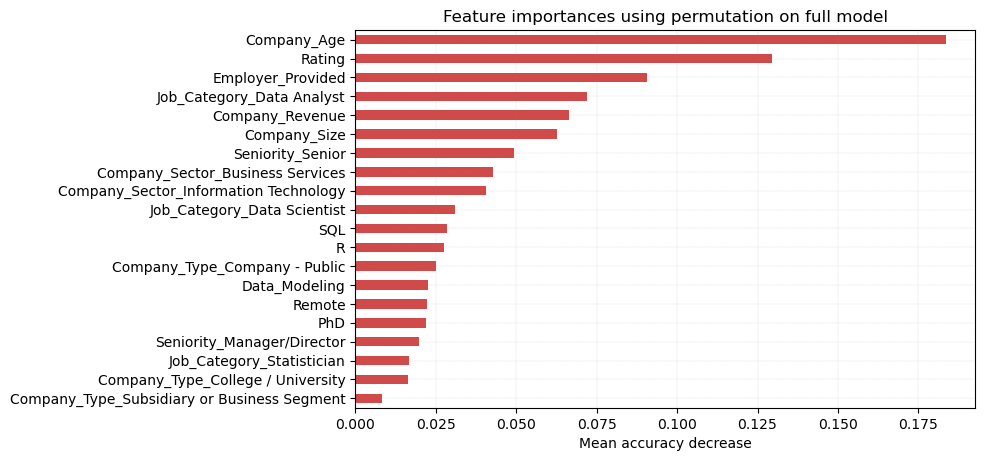

In [87]:
# bar plot for Gini impurity 
plt.figure(figsize=(8,5), dpi=100)
forest_importances.plot.barh(yerr=result, color='#d14949')
plt.title("Feature importances using permutation on full model")
plt.xlabel("Mean accuracy decrease")
plt.gca().invert_yaxis()
plt.grid(color='#948789', linestyle='-.', linewidth=0.1);

Overall, removing p values lower than .05 did not prove much better than incorporating all features. I will stick with the model with more features, which is still interpretable and provides better results.

#### Test Ensembles

In [88]:
# even though we will not use the condensed model \
# I will check their predictions to bookend the process

# test
pred_lm_reduced = lm_reduced.predict(X_test2)
pred_lasso_reduced = lasso_scaled_reduced_alpha.predict(X_scaled_test2)
pred_ridge_reduced = lasso_scaled_reduced_alpha.predict(X_scaled_test2)
pred_rf_reduced = rf_reduced.predict(X_test2)

In [89]:
mean_absolute_error(y_test2, pred_lm_reduced)
np.sqrt(metrics.mean_squared_error(y_test2, pred_lm_reduced))

21.319986947245553

In [90]:
mean_absolute_error(y_test2, pred_lasso_reduced)
np.sqrt(metrics.mean_squared_error(y_test2, pred_lasso_reduced))

21.33780492519084

In [91]:
mean_absolute_error(y_test2, pred_ridge_reduced)
np.sqrt(metrics.mean_squared_error(y_test2, pred_ridge_reduced))

21.33780492519084

In [92]:
mean_absolute_error(y_test2, pred_rf_reduced)
np.sqrt(metrics.mean_squared_error(y_test2, pred_rf_reduced))

17.735609173512003

Sadly, the reduced features models were unable to capture more predictibility through feature reduction. I will stick with the previous model, specifically the Random Forest with all features